In [ ]:
pip install resampy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.getcwd())

/content


In [ ]:
data_path = '/content/drive/MyDrive/DST24 09/machine-sound-daata'
print(os.listdir(data_path))

['normal', 'abnormal', '5sec', 'train', 'val', 'test', 'Coffee_Machine_CNN.ipynb']


In [ ]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

normal
abnormal
5sec
train
val
test
Coffee_Machine_CNN.ipynb


In [ ]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [ ]:
from pickle import dump
from pickle import load

In [ ]:
train_data = data_path+"/train"
os.listdir(train_data)

['n_00000004_0.wav',
 'n_00000003_0.wav',
 'n_00000000_5000.wav',
 'n_00000001_0.wav',
 'n_00000001_5000.wav',
 'n_00000002_0.wav',
 'n_00000002_5000.wav',
 'n_00000005_0.wav',
 'n_00000005_5000.wav',
 'n_00000007_0.wav',
 'n_00000007_5000.wav',
 'n_00000010_5000.wav',
 'n_00000008_0.wav',
 'n_00000008_5000.wav',
 'n_00000017_0.wav',
 'n_00000017_5000.wav',
 'n_00000011_5000.wav',
 'n_00000013_5000.wav',
 'n_00000016_0.wav',
 'n_00000016_5000.wav',
 'n_00000015_0.wav',
 'n_00000014_0.wav',
 'n_00000012_0.wav',
 'n_00000012_5000.wav',
 'n_00000021_0.wav',
 'n_00000021_5000.wav',
 'n_00000019_5000.wav',
 'n_00000020_0.wav',
 'n_00000023_0.wav',
 'n_00000022_0.wav',
 'n_00000018_5000.wav',
 'n_00000024_0.wav',
 'n_00000024_5000.wav',
 'n_00000025_5000.wav',
 'n_00000030_0.wav',
 'n_00000026_0.wav',
 'n_00000027_0.wav',
 'n_00000029_0.wav',
 'n_00000029_5000.wav',
 'n_00000031_0.wav',
 'n_00000031_5000.wav',
 'n_00000037_5000.wav',
 'n_00000032_0.wav',
 'n_00000038_0.wav',
 'n_00000038_500

In [ ]:
val_data = data_path+"/val"
os.listdir(val_data)

['n_00000009_5000.wav',
 'n_00000010_0.wav',
 'n_00000025_0.wav',
 'n_00000030_5000.wav',
 'n_00000026_5000.wav',
 'n_00000027_5000.wav',
 'n_00000028_5000.wav',
 'n_00000037_0.wav',
 'n_00000032_5000.wav',
 'n_00000043_0.wav',
 'n_00000046_0.wav',
 'n_00000050_5000.wav',
 'n_00000052_0.wav',
 'n_00000061_5000.wav',
 'n_00000060_0.wav',
 'n_00000072_0.wav',
 'n_00000078_5000.wav',
 'n_00000076_5000.wav',
 'n_00000075_5000.wav',
 'n_00000085_5000.wav',
 'n_00000081_0.wav',
 'n_00000090_0.wav',
 'n_00000092_5000.wav',
 'n_00000087_0.wav',
 'n_00000099_5000.wav',
 'n_00000098_0.wav',
 'n_00000105_5000.wav',
 'n_00000110_5000.wav',
 'n_00000109_0.wav',
 'n_00000108_5000.wav',
 'n_00000115_0.wav',
 'n_00000117_5000.wav',
 'n_00000128_0.wav',
 'n_00000128_5000.wav',
 'n_00000130_5000.wav',
 'n_00000134_0.wav',
 'n_00000136_5000.wav',
 'n_00000140_0.wav',
 'n_00000141_0.wav',
 'n_00000137_0.wav',
 'n_00000149_5000.wav',
 'n_00000146_0.wav',
 'n_00000145_0.wav',
 'n_00000148_0.wav',
 'n_000001

In [ ]:
test_data = data_path+"/test"
os.listdir(test_data)

['n_00000004_5000.wav',
 'n_00000003_5000.wav',
 'n_00000000_0.wav',
 'n_00000009_0.wav',
 'n_00000006_0.wav',
 'n_00000006_5000.wav',
 'n_00000011_0.wav',
 'n_00000013_0.wav',
 'n_00000015_5000.wav',
 'n_00000014_5000.wav',
 'n_00000019_0.wav',
 'n_00000020_5000.wav',
 'n_00000023_5000.wav',
 'n_00000022_5000.wav',
 'n_00000018_0.wav',
 'n_00000028_0.wav',
 'n_00000034_0.wav',
 'n_00000043_5000.wav',
 'n_00000039_5000.wav',
 'n_00000044_0.wav',
 'n_00000049_5000.wav',
 'n_00000052_5000.wav',
 'n_00000055_0.wav',
 'n_00000055_5000.wav',
 'n_00000053_0.wav',
 'n_00000062_0.wav',
 'n_00000065_5000.wav',
 'n_00000064_5000.wav',
 'n_00000063_5000.wav',
 'n_00000067_0.wav',
 'n_00000067_5000.wav',
 'n_00000071_5000.wav',
 'n_00000066_0.wav',
 'n_00000066_5000.wav',
 'n_00000079_0.wav',
 'n_00000079_5000.wav',
 'n_00000077_0.wav',
 'n_00000085_0.wav',
 'n_00000083_5000.wav',
 'n_00000082_0.wav',
 'n_00000086_5000.wav',
 'n_00000080_0.wav',
 'n_00000088_0.wav',
 'n_00000097_5000.wav',
 'n_000

In [ ]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [ ]:
normal_train

'/content/drive/MyDrive/DST24 09/machine-sound-daata/train/n_*.wav'

In [ ]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [ ]:
import librosa
import librosa.display

In [ ]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [ ]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [ ]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [ ]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [ ]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [ ]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [ ]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [ ]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [ ]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

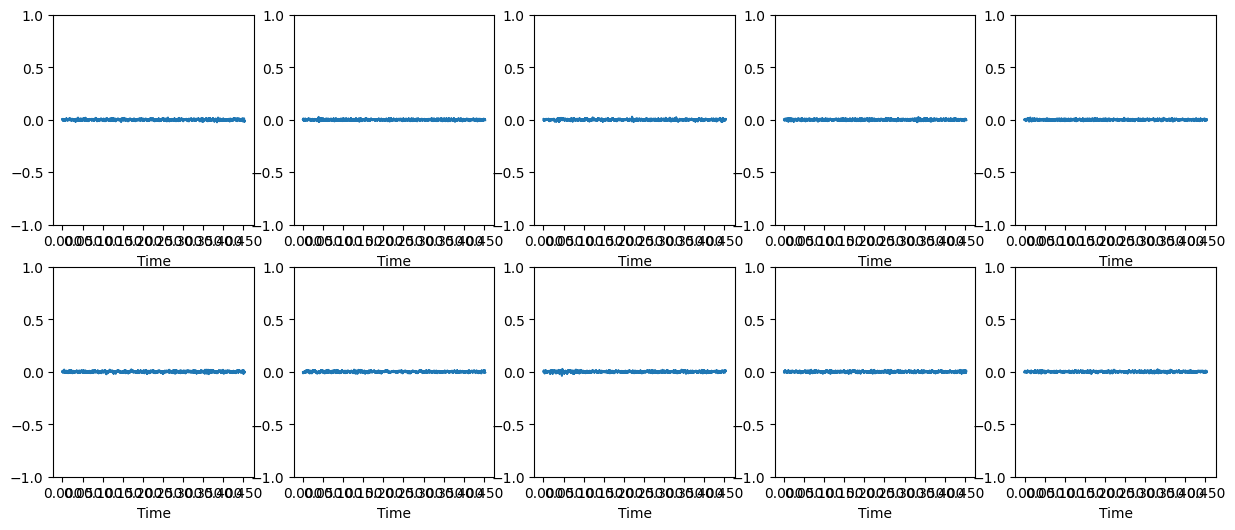

In [ ]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

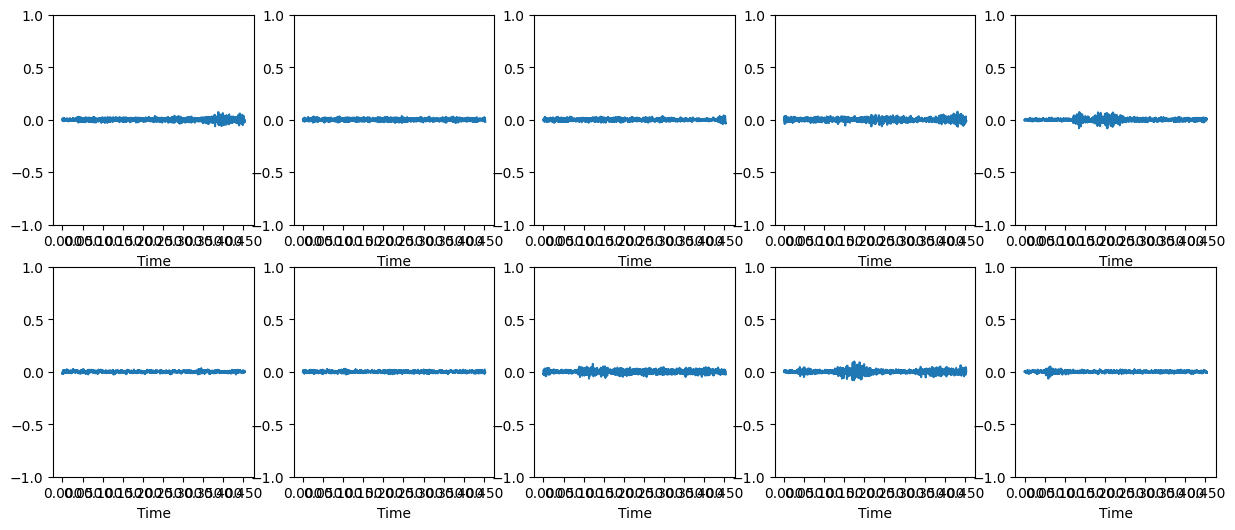

In [ ]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [ ]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [ ]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [ ]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [ ]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [ ]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.29687500e-02 1.90580011e+03]
[2.49023438e-02 1.36677989e+03]
[5.66406250e-02 2.03547435e+03]
[4.00390625e-02 1.54595507e+03]


Text(0, 0.5, 'Count')

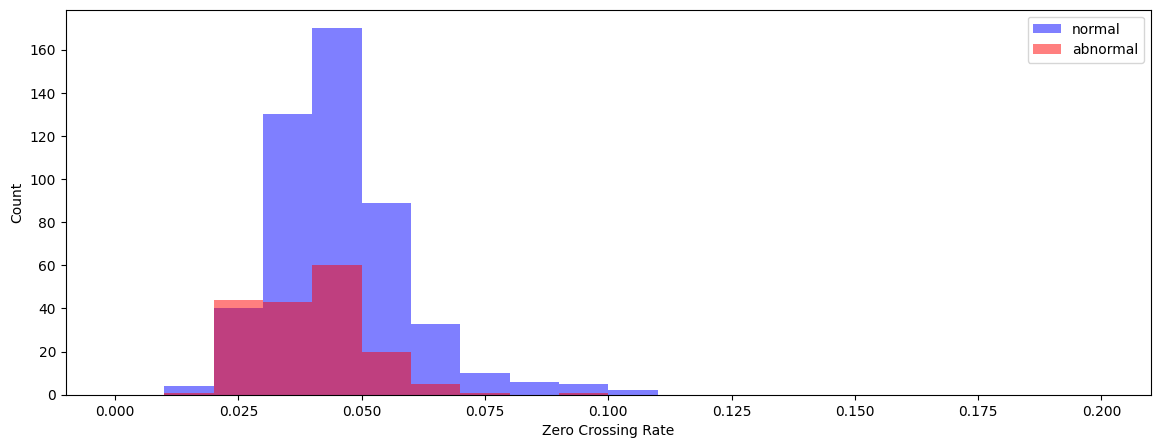

In [ ]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

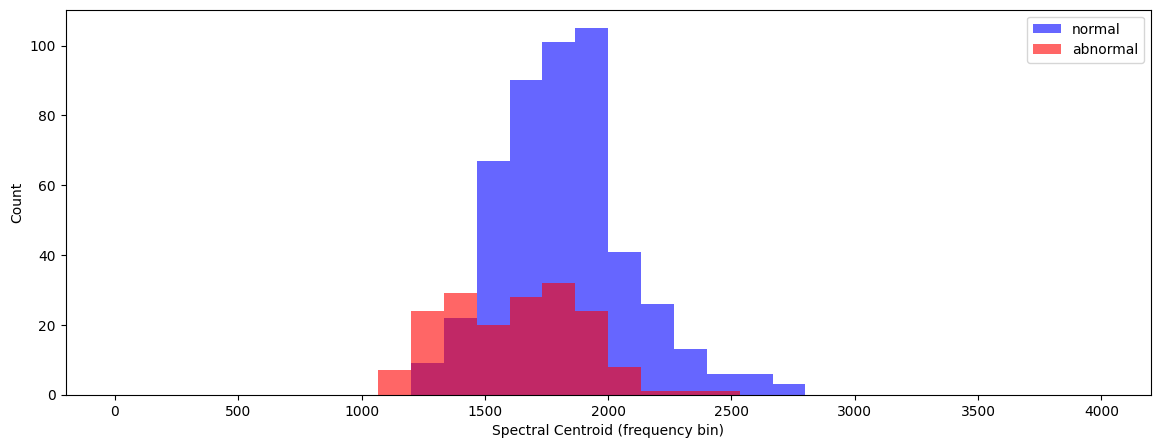

In [ ]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [ ]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [ ]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

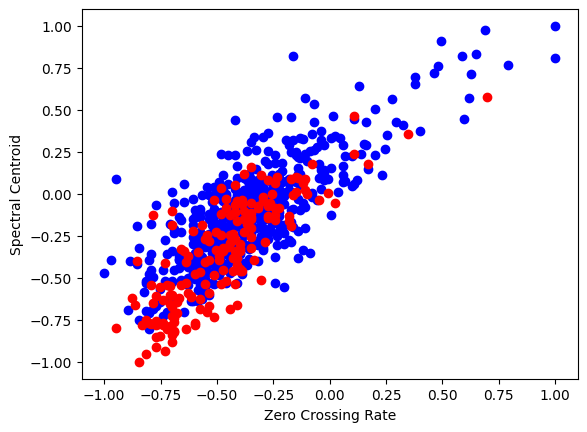

In [ ]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [ ]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [ ]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [ ]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [ ]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [ ]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [ ]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [ ]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4195 - loss: 0.7238 - val_accuracy: 0.7229 - val_loss: 0.6813
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6489 - loss: 0.6906 - val_accuracy: 0.7108 - val_loss: 0.6528
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7140 - loss: 0.6557 - val_accuracy: 0.7169 - val_loss: 0.6327
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7423 - loss: 0.6313 - val_accuracy: 0.7108 - val_loss: 0.6186
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7203 - loss: 0.6229 - val_accuracy: 0.7108 - val_loss: 0.6075
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7418 - loss: 0.6024 - val_accuracy: 0.7169 - val_loss: 0.5997
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7258 - loss: 0.6025 - val_accuracy: 0.7229 - val_loss: 0.5940
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7405 - loss: 0.5777 - val_accu

In [ ]:
import plotly
import plotly.graph_objs as go

In [ ]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
file_name = '/content/drive/MyDrive/DST24 09/machine-sound-daata/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


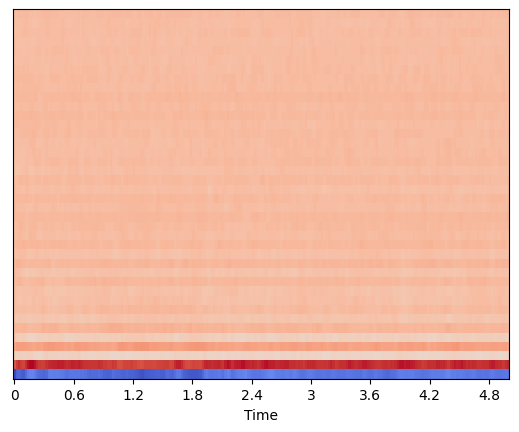

In [ ]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [ ]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [ ]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [ ]:
normal_train_features[0].shape

(40, 216)

In [ ]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [ ]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [ ]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [ ]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [ ]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [ ]:


num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [ ]:



model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.4972 - loss: 18.6393
Epoch 1: val_loss improved from inf to 1.30908, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 524ms/step - accuracy: 0.5086 - loss: 18.2351 - val_accuracy: 0.7169 - val_loss: 1.3091
Epoch 2/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6482 - loss: 2.6354
Epoch 2: val_loss improved from 1.30908 to 0.98484, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6278 - loss: 2.5731 - val_accuracy: 0.7169 - val_loss: 0.9848
Epoch 3/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7390 - loss: 2.2791
Epoch 3: val_loss did not improve from 0.98484
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7358 - loss: 2.1770 - val_accuracy: 0.3072 - val_loss: 1.0819
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5123 - loss: 1.1435
Epoch 4: val_loss improved from 0.98484 to 0.50497, saving model to best_model.keras
11/11 ━━━

In [ ]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [ ]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [ ]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.2455, acc: 0.8991
Validation- loss: 0.2610, acc: 0.8916


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 18  29]]


In [ ]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.8686    1.0000    0.9297       119
    abnormal     1.0000    0.6170    0.7632        47

    accuracy                         0.8916       166
   macro avg     0.9343    0.8085    0.8464       166
weighted avg     0.9058    0.8916    0.8825       166



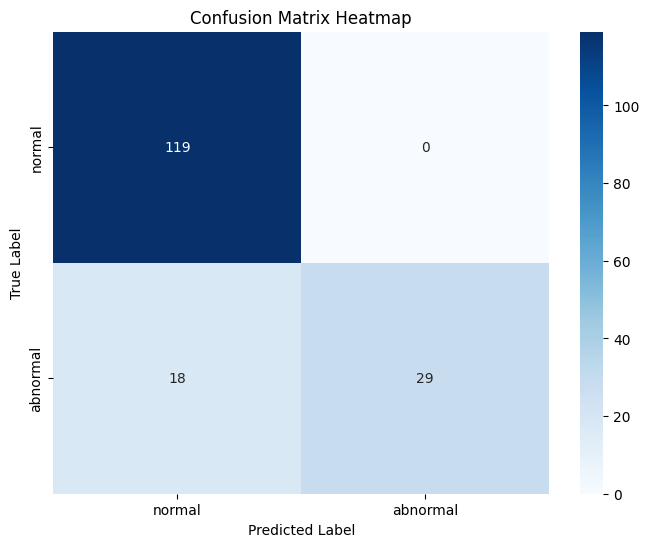

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

##LAB WEEK8-Test

In [340]:
file_name = '/content/drive/MyDrive/DST24 09/machine-sound-daata/test/a_00000017_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


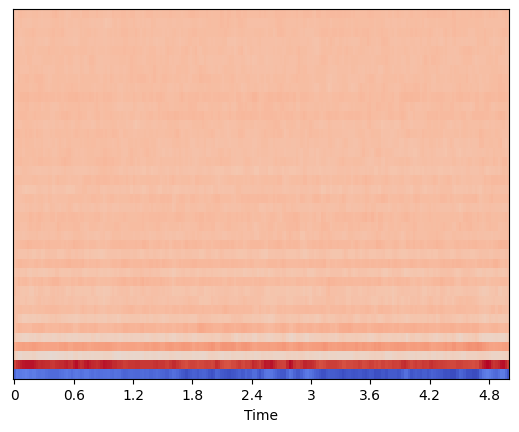

In [341]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [342]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [343]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [344]:
normal_train_features[0].shape

(40, 216)

In [345]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [346]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [347]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [348]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [349]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [350]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [351]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [352]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [353]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [354]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [355]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [356]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.5958 - loss: 6.9081
Epoch 1: val_loss improved from inf to 1.17632, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 599ms/step - accuracy: 0.5951 - loss: 6.8451 - val_accuracy: 0.7169 - val_loss: 1.1763
Epoch 2/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7209 - loss: 2.1120
Epoch 2: val_loss improved from 1.17632 to 0.57263, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7255 - loss: 2.0938 - val_accuracy: 0.7169 - val_loss: 0.5726
Epoch 3/50
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3876 - loss: 1.9642
Epoch 3: val_loss did not improve from 0.57263
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4800 - loss: 1.7817 - val_accuracy: 0.7169 - val_loss: 0.9509
Epoch 4/50
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7373 - loss: 0.8376
Epoch 4: val_loss did not improve from 0.57263
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accurac

In [357]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [358]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [359]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [360]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")

Training  - loss: 0.1601, acc: 0.9578
Validation- loss: 0.1874, acc: 0.9458


In [361]:
print("x_train shape:", getattr(x_train, "shape", "no shape"))
print("y_train shape:", getattr(y_train, "shape", "no shape"))
print("x_val shape:", getattr(x_val, "shape", "no shape"))
print("y_val shape:", getattr(y_val, "shape", "no shape"))

x_train shape: (664, 40, 216, 1)
y_train shape: (664, 2)
x_val shape: (166, 40, 216, 1)
y_val shape: (166, 2)


In [362]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


In [363]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118   1]
 [  8  39]]


In [364]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9365    0.9916    0.9633       119
    abnormal     0.9750    0.8298    0.8966        47

    accuracy                         0.9458       166
   macro avg     0.9558    0.9107    0.9299       166
weighted avg     0.9474    0.9458    0.9444       166



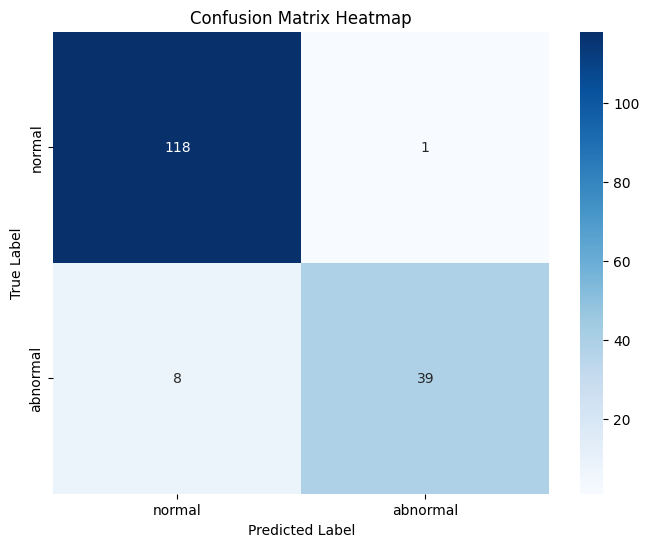

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()